In [43]:
import pandas as pd
from IPython.display import display
import matplotlib as plt

In [36]:
df = pd.read_excel('Excluir.xlsx')
df.head(5)

,MOB-B,CODIGO,DESCRIÇÃO,CODIGO_MATERIAL,DESCRIÇÃO_MATERIAL,COMP,LARG,ESP,OP_SUP,OP_INF,OP_LAT,FU_SUP,FU_INF,FU_LAT,CAV_SUP,CAV_INF,CAV_LAT,FRE_SUP,FRE_INF,FRE_LAT,DESIGNAÇÃO,DESIGNAÇÃO-CODIGO,DESIGNAÇÃO+ISOLANTE,REFERÊNCIA,LEVEL_ATTRIBUTE,INDEX_3D,MACHINING_PROCESSES,RECTANGULAR,MATERIAL,MATTER_REFERENCE,MATTER_SUPPLIER,MATTER_GRAIN_ORIENTATION,MASSA,SURFACE,GRAIN_ORIENTATION,VALORISATION_REFERENCE,VALORISATION_DESIGNATION,EDGES_CUT_TYPES,ONE_EDGE_OR_LAMINATE_AXIS_1,ONE_EDGE_OR_LAMINATE_AXIS_2,ONE_EDGE_OR_LAMINATE_AXIS_3,ONE_EDGE_OR_LAMINATE_AXIS_4,ONE_EDGE_OR_LAMINATE_AXIS_5,ONE_EDGE_OR_LAMINATE_AXIS_6,CAM_FILE_NAME_0,CAM_FILE_NAME_1,CAM_FILE_NAME_2,CAM_FILE_NAME_3,CAM_FILE_NAME_4,CAM_FILE_NAME_6,ELEMENT_IDENTIFIER,CÓDIGO_DO_COMPONENTE,VALOR_DO_PARÂMETRO_DO_COMPONENTE,VALOR_DO_TEXTO_DO_COMPONENTE,OBJECT_TYPE,TEMPLATE_PATH,COMPONENT_STANDARD,COMPONENT_FAMILY,COMPONENT_TYPE,COMPONENT_VARIANT,COMPONENT_VERSION,COMPONENT_TEMPLATE_DESIGNATION,COMPONENT_TEMPLATE_REFERENCE,MATTER_(LONG_NAME),MATTER_(NAME),MATTER_DESIGNATION,MATTER_PREVIEW,REVESTIMENTO,COATING_(LONG_NAME),COATING_(NAME),COATING_DESIGNATION,COATING_REFERENCE,COATING_SUPPLIER,COATING_PREVIEW,FINISHING,FINISHING_(LONG_NAME),FINISHING_(NAME),FINISHING_DESIGNATION,FINISHING_REFERENCE,FINISHING_SUPPLIER,PERIMETER,INTERNAL_PERIMETER,AREA,WEIGHT,BOX_LENGTH_ALONG_X,BOX_LENGTH_ALONG_Y,NESTING_DESIGNATION,NESTING_NAME,NESTING_NUMBER_OF_COPIES,NESTING_LOSS_RATE,NESTING_TOTAL_PERIMETER,ORIGINAL_ELEMENT_IDENTIFIER,LABEL_X_COORDINATE,LABEL_Y_COORDINATE,LABEL_ANGLE,NUMBER_OF_PARTS,USED_LENGTH,USED_WIDTH,SUPPORT_LENGTH,SUPPORT_WIDTH,SUPPORT_THICKNESS,SUPPORT_DESIGNATION,SUPPORT_REFERENCE,MEASURE_1,MINIMAL_LENGTH,PROFILE_CUT_ANGLE_1,PROFILE_CUT_ANGLE_2,PART_LENGTH,PART_WIDTH,PART_THICKNESS,MIRROR_PART,ESPESSURA,CAMINHO_DE_SALVAGUARDA_DA_DOBRAGEM,FOUR_EDGES_OR_LAMINATES,ALL_EDGES_CODIFICATION,SIX_EDGES_OR_LAMINATES,PART_CATEGORY,EDGE_OR_LAMINATE_CODIFICATION,PANEL_MATTER_(LONG_NAME),PANEL_MATTER_(NAME),PANEL_MATTER_DESIGNATION,PANEL_MATTER_REFERENCE,PANEL_MATTER_SUPPLIER,PANEL_COATING,PANEL_COATING_(LONG_NAME),PANEL_COATING_(NAME),PANEL_COATING_DESIGNATION,PANEL_COATING_REFERENCE,PANEL_COATING_SUPPLIER,PANEL_FINISHING,PANEL_FINISHING_(LONG_NAME),PANEL_FINISHING_(NAME),PANEL_FINISHING_DESIGNATION,PANEL_FINISHING_REFERENCE,PANEL_FINISHING_SUPPLIER,FIRST_WORK_STATION,SECOND_WORK_STATION,CONTADOR,TOTAL_COUNT,DESIGNATION|OWNER_1,DESIGNATION|OWNER_N,DESIGNATION|OWNER_PRJ,DIRECT_OWNER'S_REFERENCE,REFERENCE|OWNER_N,ROOT_OWNER'S_REFERENCE,DESCRIPTION,FORNECEDOR,COMENTÁRIO,ASSEMBLY_LEVEL,ÍNDICE,CHAVE_DE_ÍNDICE,DIRECT_OWNER'S_3D_INDEX,3D_INDEX|OWNER_N,ROOT_OWNER'S_3D_INDEX,INDEX_KEY_3D,SECOND_INDEX_3D,DIRECT_OWNER'S_SECOND_3D_INDEX,SECOND_3D_INDEX|OWNER_N,ROOT_OWNER'S_SECOND_3D_INDEX,PROCESSANDO,PART_TYPE,DIRECT_OWNER'S_TYPE,TYPE|OWNER_N,ROOT_OWNER'S_TYPE,DOCUMENT_NAME,DOCUMENT_NAME_WITHOUT_SUFFIX,DOCUMENT_PATH,DOCUMENT_DIRECTORY,VALORISATION_TYPE,VALORISATION_UNITARY_VALUE,VALORISATION_LENGTH_VALUE,VALORISATION_SURFACE_VALUE,VALORISATION_VOLUME_VALUE,SECOND_CAM_FILE_NAME_0,SECOND_CAM_FILE_NAME_1,SECOND_CAM_FILE_NAME_2,SECOND_CAM_FILE_NAME_3,SECOND_CAM_FILE_NAME_4,SECOND_CAM_FILE_NAME_5,SECOND_CAM_FILE_NAME_6,SECOND_CAM_FILE_NAME_7,SECOND_CAM_FILE_NAME_8,SECOND_CAM_FILE_NAME_9,SECOND_CAM_FILE_NAME_10,SECOND_CAM_FILE_NAME_11,SECOND_CAM_FILE_NAME_12,SECOND_CAM_FILE_NAME_13,SECOND_CAM_FILE_NAME_14,SECOND_CAM_FILE_NAME_15,SECOND_CAM_FILE_NAME_16,SECOND_CAM_FILE_NAME_17,SECOND_CAM_FILE_NAME_18,DRAFT_FILE_NAME_0,DRAFT_FILE_NAME_1,DRAFT_FILE_NAME_2,PARTS_LIST_IDENTIFICATION_0,PARTS_LIST_IDENTIFICATION_1,PARTS_LIST_IDENTIFICATION_2
0,-,800.01.00000295,AAE - COZ,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,AAE - COZ,AAE - COZ,AAE - COZ,NaN,0.0,1.0,NaN,NÃO,NaN,NaN,NaN,NaN,110540.48,2024-01-21 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10115,NaN,0,NaN,TYPE_SA,C:\Users\pessoni\Desktop\TopSolid\Projeto OPUS...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

In [59]:
def print_column_dtypes(df):
    for col in df.columns:
        print(f'Coluna: {col}, Tipo de dado: {df[col].dtype}')


def numerical_distribution(df):
    numerical_cols = df.select_dtypes(include=['number']).columns
    stats = df[numerical_cols].describe().T
    pd.set_option('display.max_columns', None) 
    print(stats)


def count_column_types(df):
    column_types = df.dtypes.value_counts()
    return column_types

def categorical_distribution(df):
    categorical_cols = df.select_dtypes(include=['object']).columns
    unique_counts = df[categorical_cols].nunique()
    return unique_counts


def detailed_column_analysis(df):
    for col in df.columns:
        print(f'Coluna: {col}')
        print(f'Tipo de dado: {df[col].dtype}')
        
        if df[col].dtype in ['int64', 'float64']:
            print(df[col].describe())
        else:
            print(df[col].value_counts())
        
        print('\n' + '-'*50 + '\n')


def print_null_values_percentage(df):
    null_counts = df.isnull().sum()
    null_percentage = (null_counts / len(df)) * 100
    null_stats = pd.DataFrame({'Nulos': null_counts, 'Porcentagem': null_percentage})
    null_stats_sorted = null_stats.sort_values(by='Nulos', ascending=False)

    for index, row in null_stats_sorted.iterrows():
        print(f'Coluna: {index}, Nulos: {row["Nulos"]}, Porcentagem: {row["Porcentagem"]:.2f}%')
        

def remove_completely_null_columns(df):
    cols_to_remove = df.columns[df.isnull().all()]
    df.drop(columns=cols_to_remove, inplace=True)
    return df


def print_unique_values(df):
    unique_counts = df.nunique().sort_values(ascending=False)
    for col, count in unique_counts.items():
        print(f'Coluna: {col}, Valores únicos: {count}')


def plot_boxplots_all_numerical(df):
    numerical_cols = df.select_dtypes(include=['number']).columns
    # Filtrar colunas com mais de um valor único
    numerical_cols = [col for col in numerical_cols if df[col].nunique() > 1]
    df[numerical_cols].plot(kind='box', subplots=True, layout=(len(numerical_cols)//4+1, 4), figsize=(20, 15), vert=False)
        

def plot_scatter_matrix_filtered(df):
    numerical_cols = df.select_dtypes(include=['number']).columns
    # Filtrar colunas com mais de um valor único
    numerical_cols = [col for col in numerical_cols if df[col].nunique() > 1]
    scatter_matrix = pd.plotting.scatter_matrix(df[numerical_cols], figsize=(30, 20), diagonal='kde')

    # Melhorar o ângulo dos labels dos eixos x e y
    for ax in scatter_matrix.ravel():
        ax.set_xlabel(ax.get_xlabel(), fontsize=12, rotation=45)
        ax.set_ylabel(ax.get_ylabel(), fontsize=12, rotation=45)
    

def count_numerical_columns_with_variation(df):
    numerical_cols = df.select_dtypes(include=['number']).columns
    varied_numerical_cols = [col for col in numerical_cols if df[col].nunique() > 1]
    return len(varied_numerical_cols)


In [32]:
df.shape

(1536, 198)

In [37]:
print_column_dtypes(df)

Coluna: MOB-B, Tipo de dado: object
Coluna: CODIGO, Tipo de dado: object
Coluna: DESCRIÇÃO, Tipo de dado: object
Coluna: CODIGO_MATERIAL, Tipo de dado: object
Coluna: DESCRIÇÃO_MATERIAL, Tipo de dado: object
Coluna: COMP, Tipo de dado: object
Coluna: LARG, Tipo de dado: float64
Coluna: ESP, Tipo de dado: object
Coluna: OP_SUP, Tipo de dado: object
Coluna: OP_INF, Tipo de dado: object
Coluna: OP_LAT, Tipo de dado: object
Coluna: FU_SUP, Tipo de dado: object
Coluna: FU_INF, Tipo de dado: object
Coluna: FU_LAT, Tipo de dado: object
Coluna: CAV_SUP, Tipo de dado: object
Coluna: CAV_INF, Tipo de dado: object
Coluna: CAV_LAT, Tipo de dado: object
Coluna: FRE_SUP, Tipo de dado: object
Coluna: FRE_INF, Tipo de dado: object
Coluna: FRE_LAT, Tipo de dado: object
Coluna: DESIGNAÇÃO, Tipo de dado: object
Coluna: DESIGNAÇÃO-CODIGO, Tipo de dado: object
Coluna: DESIGNAÇÃO+ISOLANTE, Tipo de dado: object
Coluna: REFERÊNCIA, Tipo de dado: object
Coluna: LEVEL_ATTRIBUTE, Tipo de dado: float64
Coluna: IN

In [38]:
column_type_counts = count_column_types(df)
column_type_counts

object     106
float64     92
Name: count, dtype: int64

In [39]:
detailed_column_analysis(df)

Coluna: MOB-B
Tipo de dado: object
MOB-B
800.02.00000695 - AAL 9P - S M                      620
800.02.00000696 - AAL EM L 6P - S 01                180
800.02.00000703 - AAL 3P DV - S M                   159
800.03.00000772 - ASB - CHUR                         75
800.01.00000296 - AAE - CHUR                         70
800.01.00000295 - AAE - COZ                          66
800.03.00000771 - ASB - COZ                          54
800.08.00000215 - CAB - S 01                         46
800.24.00000046 - CAM - S M                          45
800.24.00000045 - CAM - S 01                         45
800.02.00000709 - TOR - COZ                          42
800.03.00000770 - ASB 4P - S MASTER                  36
800.02.00000708 - AAL - COZ                          33
800.03.00000769 - ASB 2P - S 01                      22
Cavidade desativada                                  18
-                                                    15
Cavidade Aluminio                                     3
Cavdade

In [40]:
print_null_values_percentage(df)

Coluna: SUPPORT_WIDTH, Nulos: 1536.0, Porcentagem: 100.00%
Coluna: SECOND_CAM_FILE_NAME_13, Nulos: 1536.0, Porcentagem: 100.00%
Coluna: SUPPORT_REFERENCE, Nulos: 1536.0, Porcentagem: 100.00%
Coluna: SUPPORT_DESIGNATION, Nulos: 1536.0, Porcentagem: 100.00%
Coluna: SUPPORT_THICKNESS, Nulos: 1536.0, Porcentagem: 100.00%
Coluna: SECOND_CAM_FILE_NAME_6, Nulos: 1536.0, Porcentagem: 100.00%
Coluna: SUPPORT_LENGTH, Nulos: 1536.0, Porcentagem: 100.00%
Coluna: USED_WIDTH, Nulos: 1536.0, Porcentagem: 100.00%
Coluna: SECOND_CAM_FILE_NAME_7, Nulos: 1536.0, Porcentagem: 100.00%
Coluna: SECOND_CAM_FILE_NAME_8, Nulos: 1536.0, Porcentagem: 100.00%
Coluna: SECOND_CAM_FILE_NAME_9, Nulos: 1536.0, Porcentagem: 100.00%
Coluna: NESTING_TOTAL_PERIMETER, Nulos: 1536.0, Porcentagem: 100.00%
Coluna: NESTING_NUMBER_OF_COPIES, Nulos: 1536.0, Porcentagem: 100.00%
Coluna: NESTING_DESIGNATION, Nulos: 1536.0, Porcentagem: 100.00%
Coluna: ROOT_OWNER'S_TYPE, Nulos: 1536.0, Porcentagem: 100.00%
Coluna: FINISHING_(NAME), 

In [41]:
print('antes')
print(df.shape)
remove_completely_null_columns(df)
print('depois')
print(df.shape)

antes
(1536, 198)
depois
(1536, 139)


In [42]:
print_unique_values(df)

Coluna: ELEMENT_IDENTIFIER, Valores únicos: 1024
Coluna: ORIGINAL_ELEMENT_IDENTIFIER, Valores únicos: 1023
Coluna: CODIGO, Valores únicos: 756
Coluna: WEIGHT, Valores únicos: 658
Coluna: MASSA, Valores únicos: 656
Coluna: COMP, Valores únicos: 273
Coluna: DESIGNAÇÃO-CODIGO, Valores únicos: 269
Coluna: SURFACE, Valores únicos: 244
Coluna: DESCRIÇÃO, Valores únicos: 204
Coluna: DESIGNAÇÃO, Valores únicos: 203
Coluna: DESIGNAÇÃO+ISOLANTE, Valores únicos: 202
Coluna: LARG, Valores únicos: 189
Coluna: INDEX_3D, Valores únicos: 138
Coluna: PART_LENGTH, Valores únicos: 137
Coluna: DESIGNATION|OWNER_1, Valores únicos: 108
Coluna: VALORISATION_SURFACE_VALUE, Valores únicos: 105
Coluna: PART_WIDTH, Valores únicos: 91
Coluna: SIX_EDGES_OR_LAMINATES, Valores únicos: 52
Coluna: FOUR_EDGES_OR_LAMINATES, Valores únicos: 52
Coluna: TEMPLATE_PATH, Valores únicos: 52
Coluna: DIRECT_OWNER'S_3D_INDEX, Valores únicos: 49
Coluna: MATTER_DESIGNATION, Valores únicos: 34
Coluna: VALORISATION_LENGTH_VALUE, Valo

In [61]:
num_varied_numerical_cols = count_numerical_columns_with_variation(df)
print(f"colunas com mais de um dado unico: {num_varied_numerical_cols}")

colunas com mais de um dado unico: 15


Matriz de Dispersão


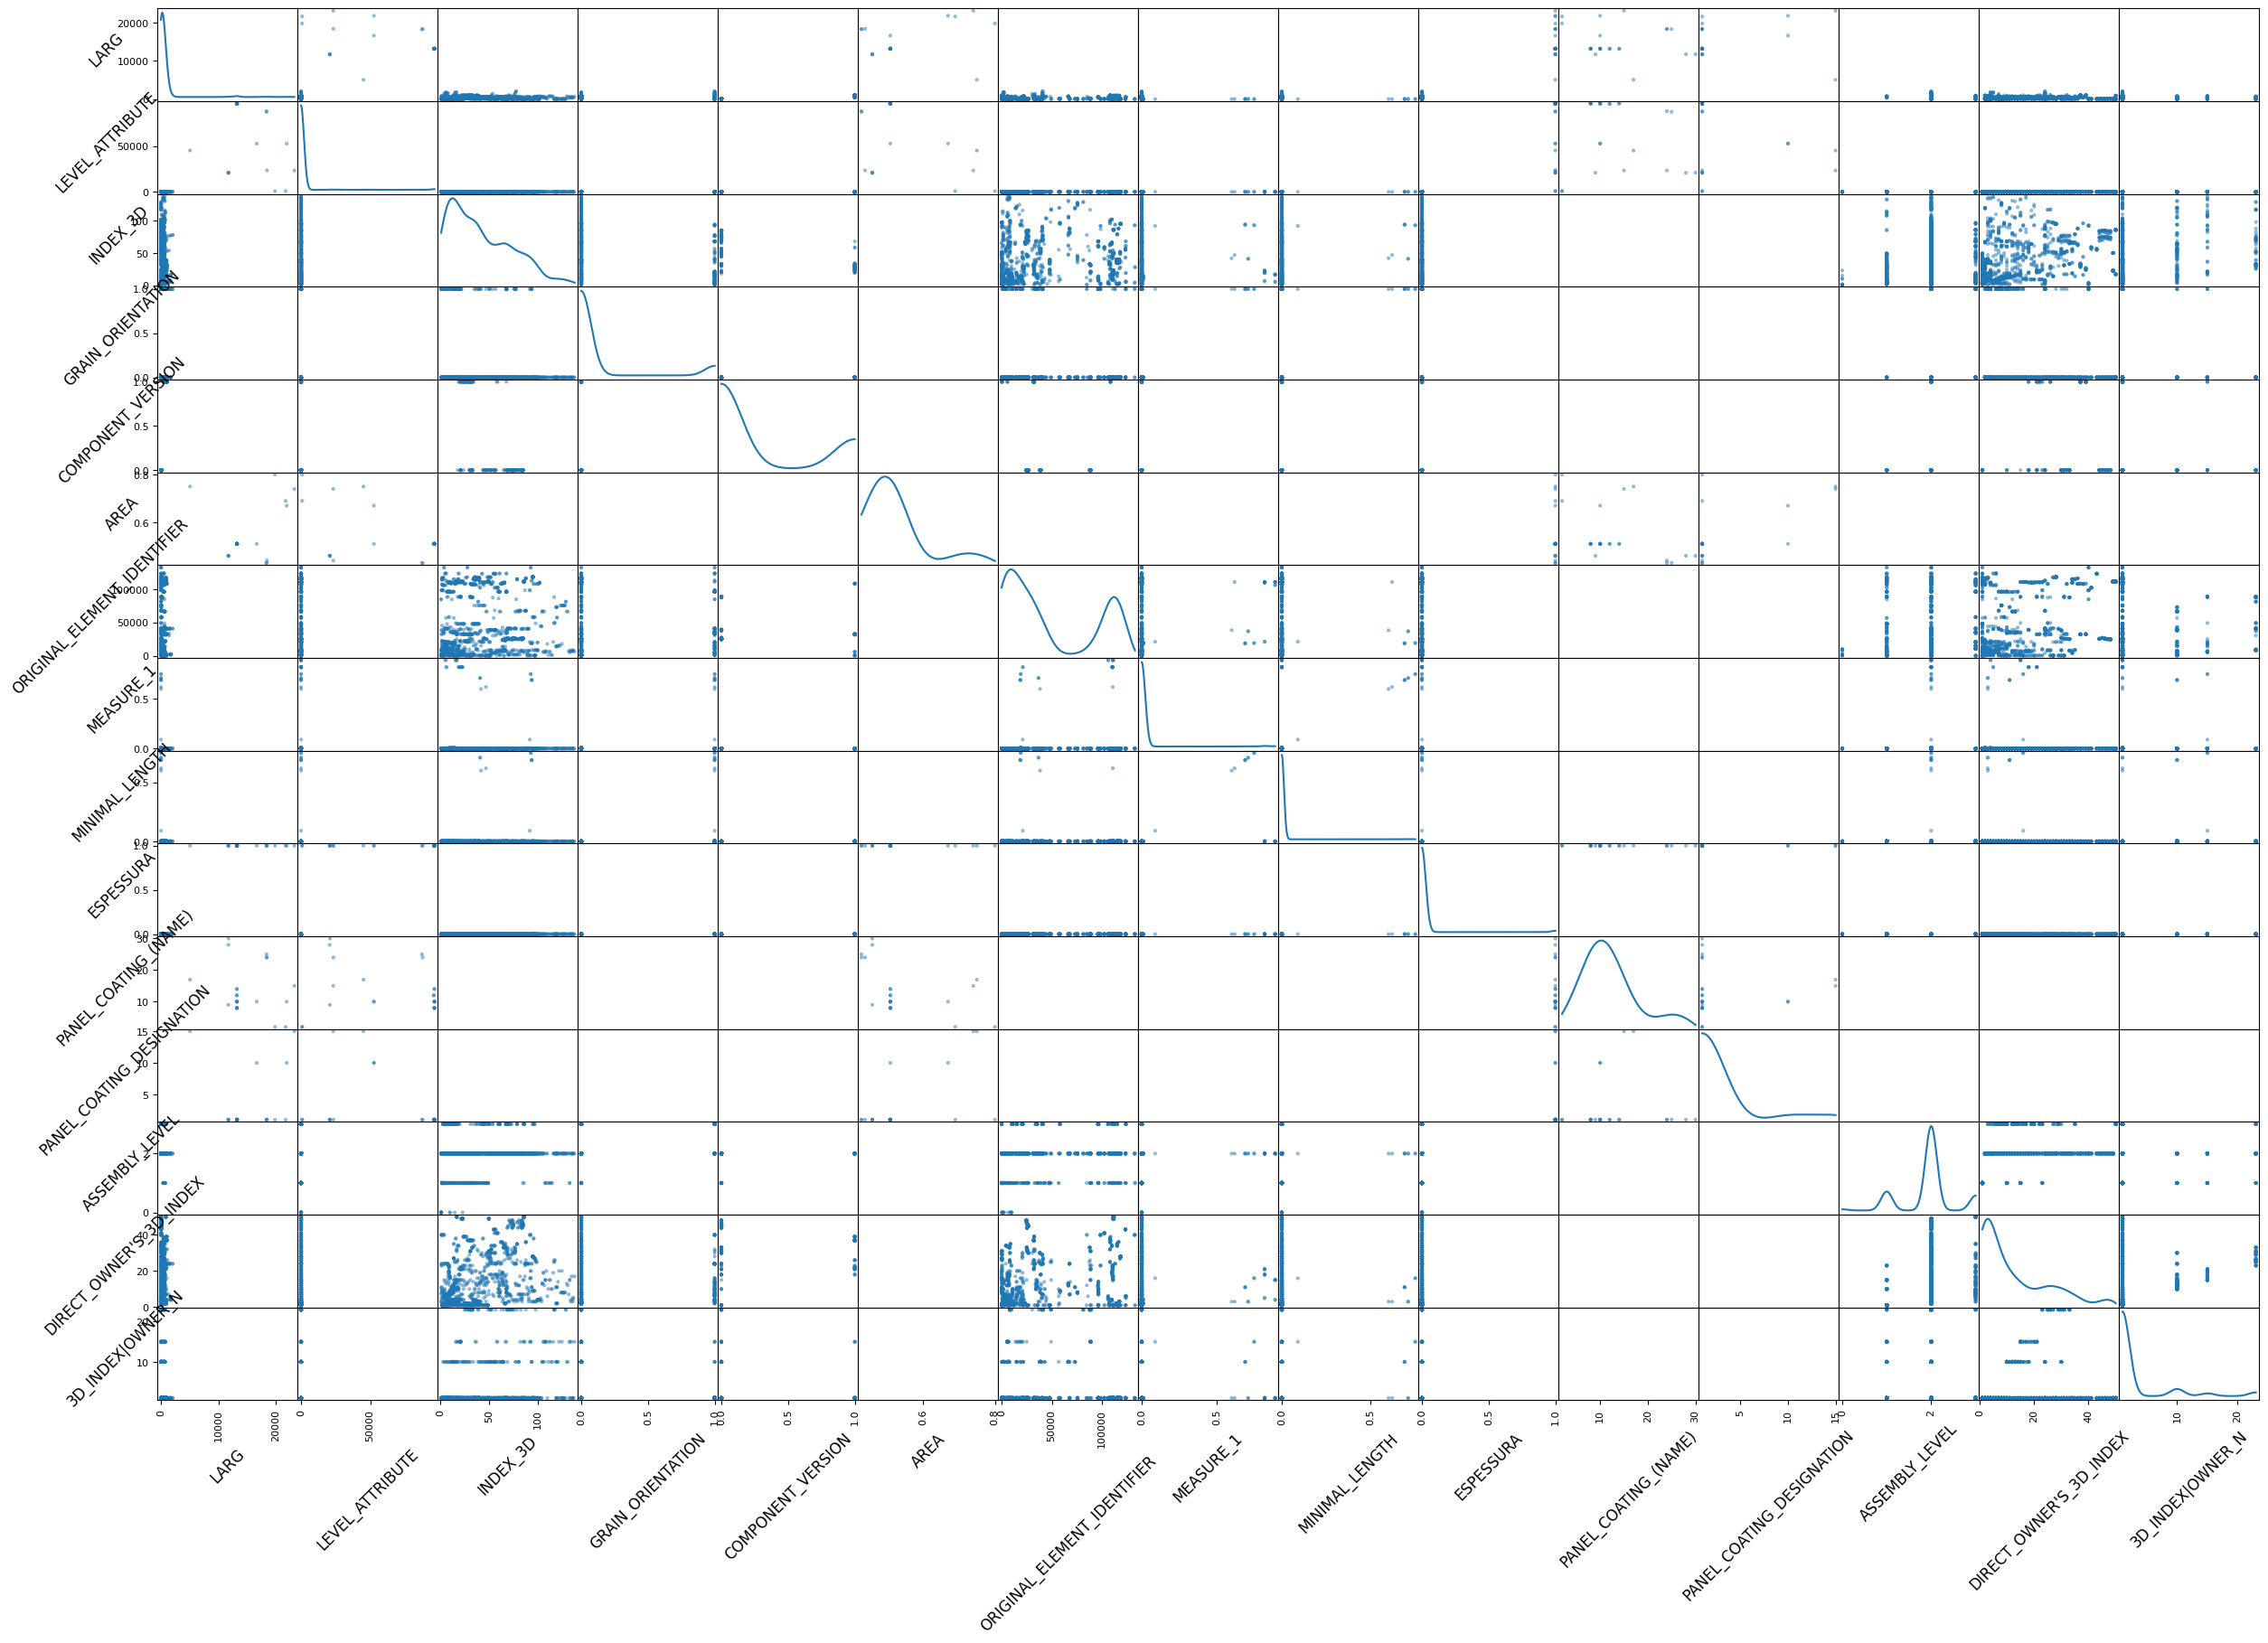

In [57]:
print('Matriz de Dispersão')
plot_scatter_matrix_filtered(df)

Boxplots das Colunas Numéricas


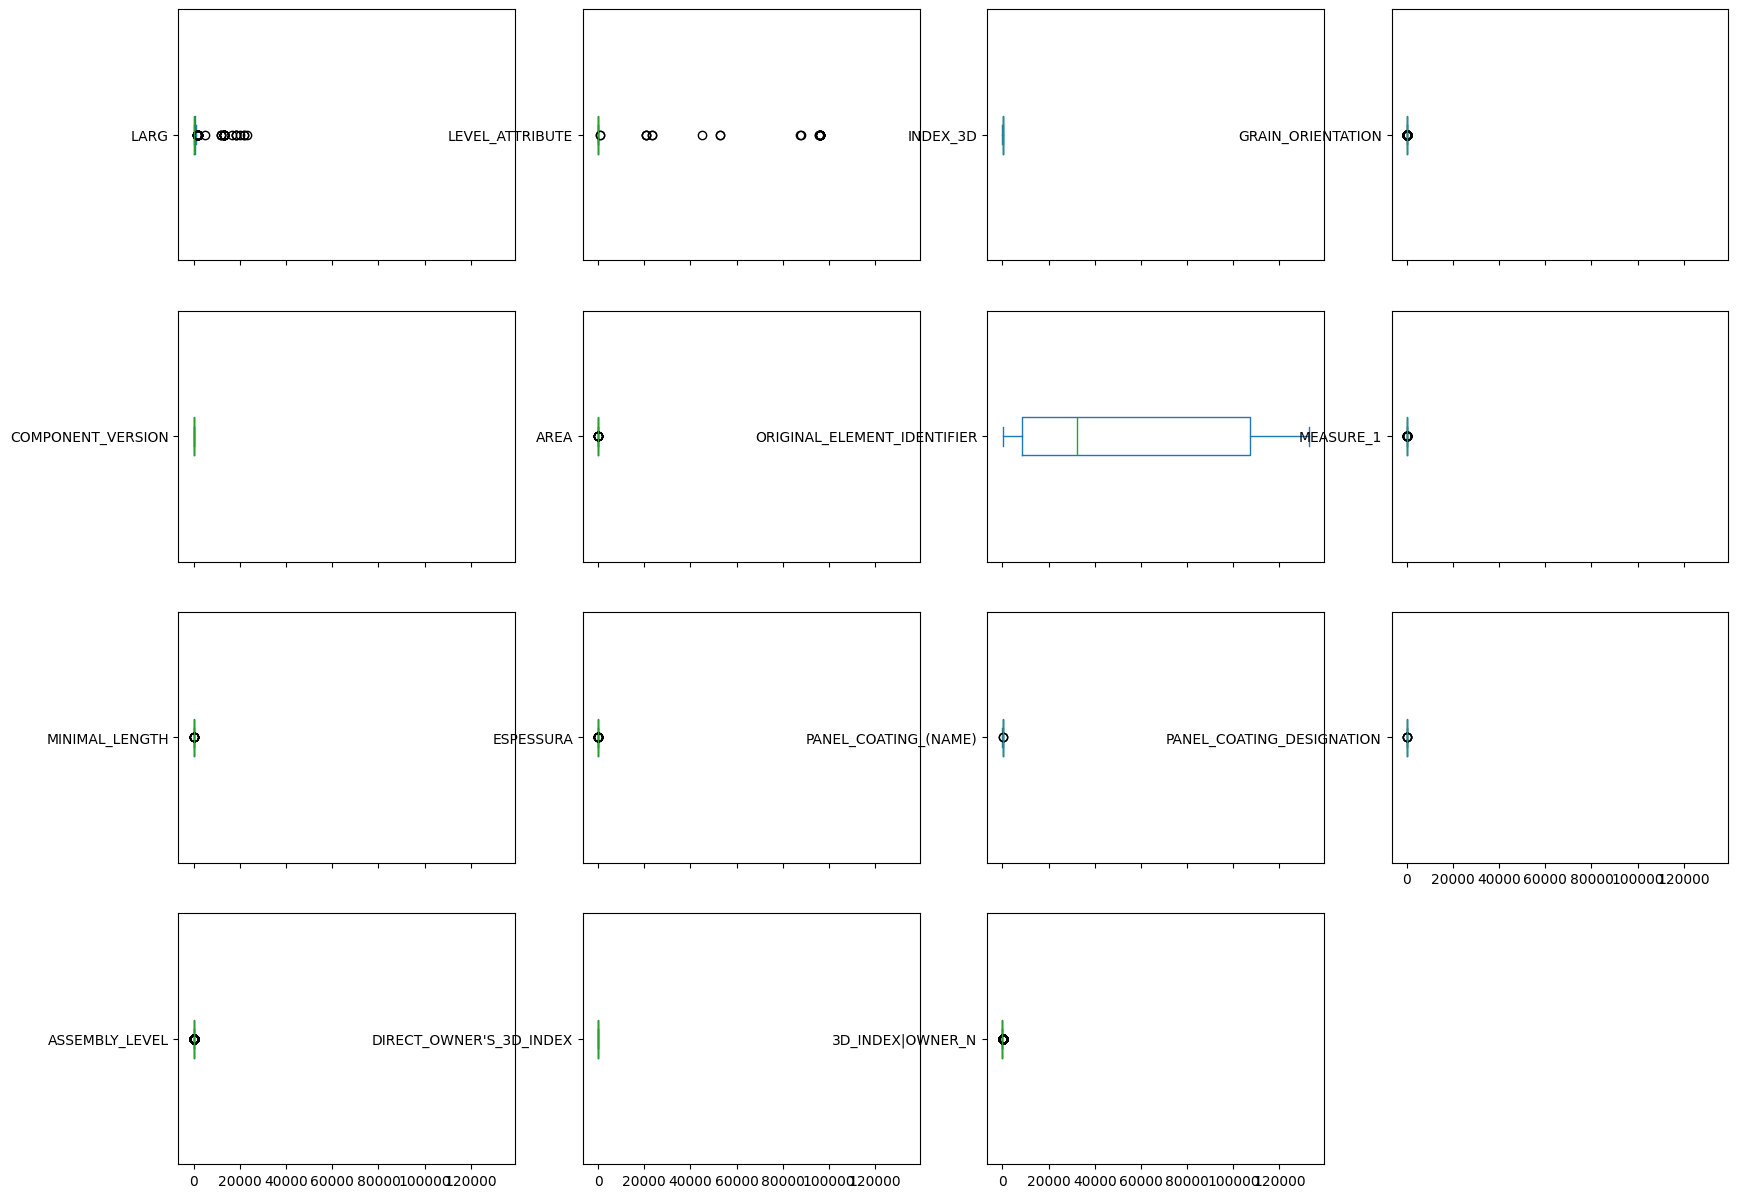

In [58]:
print('Boxplots das Colunas Numéricas')
plot_boxplots_all_numerical(df)